# Furniture Sales Analysis

## A. Introduction

> Nama  : Zaharatul Jannah

> Batch : HCK 22

As a Data Analyst, I have been assigned by the company to tackle the challenge of improving furniture sales. This program is designed to help the company optimize furniture sales based on product categories and store types.

URL DataSet : https://www.kaggle.com/datasets/rajagrawal7089/furniture-sales-data

URL Tableau : https://public.tableau.com/app/profile/zaharatul.jannah/viz/Milestone1_17297770843640/Milestone1

URL Statistik Analysis : https://public.tableau.com/app/profile/zaharatul.jannah/viz/StatistikAnalysis/Story1

## B. Problem Identification

### 1. Background

In recent years, the furniture industry has undergone significant changes, driven by shifting consumer trends and technological advancements. The increasing demand for high-quality yet affordable furniture products has created challenges for many companies in maintaining their market share. With the emergence of e-commerce platforms and intense competition, companies must adapt quickly to stay relevant.

Accurate data analysis has become crucial in understanding consumer behavior and predicting market trends. As a Data Analyst, it is essential to delve into sales data, pricing, and customer preferences to identify existing opportunities. Through this analysis, companies can develop more effective strategies to attract customers and boost sales.

Focusing on specific product categories and different store types, this program aims to establish a more targeted approach to improving furniture sales. By leveraging available data, companies can optimize product offerings, implement targeted promotions, and enhance the overall customer experience.

### 2. SMART

- **Specific**  
  Improve sales performance across all sales channels.  

- **Measurable**  
  Increase online sales by 15% and offline sales by 10%.  

- **Achievable**  
  Conduct in-depth customer data analysis to identify patterns and preferences, allowing for more effective promotional strategies.  

- **Relevant**  
  Focusing on the right marketing strategies will help reach more customers and boost sales.  

- **Time-Bound**  
  This will be achieved within 6 months.

> Problem Statement

The company faces challenges in increasing furniture sales across online and offline channels. To address this, I have set a sales growth target of 15% online and 10% offline within six months. Considering current market trends, by analyzing customer data, I will design more effective and relevant promotions to strengthen market positioning amidst intense competition.

### 3. Problem Breakdown

> 1. What are the average and median profit margins? (Descriptive Statistics)  

> 2. What is the average number of brands in each category? (Descriptive Statistics)  

> 3. Is there a significant difference in sales across product categories? (Inferential Statistics - ANOVA Test)  

> 4. What is the revenue trend based on product categories? (Visualization - Bar Chart)  

> 5. Does delivery time affect sales volume? (Visualization - Line Chart)  

> 6. What is the total revenue per product category in each store type? (Visualization - Pie Chart)  

> 7. How does total seasonal sales compare across store types? (Visualization - Stacked Bar Chart)  

> 8. How does total price compare across store types? (Visualization - Pie Chart)  

> 9. How does total discount compare across store types? (Visualization - Pie Chart)  

## C. Data Loading

In [2]:
# Import Module
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
 

In [3]:
df = pd.read_csv('Furniture.csv')
df.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


### **Column Descriptions:**  

- **Price**: The selling price of the product in the market.  
- **Cost**: The production cost or base price of the product.  
- **Sales**: The total number of products sold over a specific period.  
- **Profit Margin**: The percentage of profit earned from sales after deducting production costs.  
- **Inventory**: The number of product stocks available in the warehouse or store for sale.  
- **Discount Percentage**: The percentage of discount applied to the product.  
- **Delivery Days**: The number of days required to deliver the product to customers.  
- **Category**: The type of furniture, such as chairs, tables, or cabinets.  
- **Material**: The type of material used to make the furniture, such as wood, metal, or plastic.  
- **Color**: The color of the furniture product, such as red, blue, or black.  
- **Location**: The location or area where the store or sales take place.  
- **Season**: The season during which the sales occurred, such as summer, winter, etc.  
- **Store Type**: The type of store selling the product, such as physical stores or online stores.  
- **Brand**: The furniture brand being sold.  
- **Revenue**: The total revenue generated from furniture sales.  

## D. Data Cleaning

In [4]:
# Menampilkan semua kolom yang ada di Data Frame
pd.set_option("display.max_columns", None)
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


In [5]:
# Mengecek duplikat
duplicates = df[df.duplicated()]
print("Duplikat data:")
print(duplicates)

Duplikat data:
Empty DataFrame
Columns: [price, cost, sales, profit_margin, inventory, discount_percentage, delivery_days, category, material, color, location, season, store_type, brand, revenue]
Index: []


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [7]:
df.isnull().sum()

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64

Pada proses di atas diketahui bahwa :
1. **Struktur Data**: DataFrame ini memiliki total 2.500 baris dan 14 kolom, yang secara komprehensif mencakup seluruh informasi penjualan selama periode tertentu. Struktur ini memungkinkan analisis yang mendalam dan representatif terhadap performa penjualan.

2. **Missing Value**: Hasil analisis menunjukkan bahwa tidak terdapat Missing Value dalam dataset ini. Hal ini memastikan bahwa setiap baris data memiliki informasi lengkap, sehingga tidak diperlukan tindakan lebih lanjut untuk menangani masalah missing value.

3. **Tipe Data**: Setiap kolom dalam DataFrame telah mematuhi tipe data yang sesuai dengan ekspektasi analisis. Dengan demikian, tidak ada perubahan yang diperlukan pada nama kolom, karena semua telah diatur dengan benar dan konsisten, mendukung integritas data.

4. **Format Data**: Format untuk setiap tipe data dalam DataFrame telah ditetapkan dengan tepat dan sesuai dengan standar yang diharapkan. Oleh karena itu, tidak ada kebutuhan untuk melakukan perubahan atau penghilangan karakter tertentu, sehingga mempermudah proses analisis selanjutnya.

**Kesimpulan**: Dengan struktur yang terorganisir, tidak adanya nilai hilang, serta kesesuaian tipe dan format data, dataset ini siap untuk analisis lebih lanjut. Kesiapan ini mendukung pengambilan keputusan yang lebih baik berdasarkan data yang akurat dan komprehensif.

## E. Analisis dan Perhitungan

### 1. Berapa rata-rata dan median dari profit margin? (statistik deskriptif)

In [8]:
print('Rata-rata dari profit margin  :',df['profit_margin'].mean())
print('Median dari profit margin  :',df['profit_margin'].median())

Rata-rata dari profit margin  : 30.20857134025872
Median dari profit margin  : 30.29791097064826


Karena nilai rata-rata dan median sangat dekat, ini menunjukkan bahwa distribusi profit margin cukup merata, tanpa adanya outlier yang signifikan. Dengan kata lain, margin keuntungan cenderung stabil di sekitar nilai tersebut tanpa variasi besar antar produk atau transaksi.

### 2. Berapa rata-rata dari Brand pada setiap category nya?


In [9]:
grouped = df.groupby('brand')['profit_margin'].mean()
grouped

brand
BrandA    30.388991
BrandB    30.383503
BrandC    29.653891
BrandD    30.430387
Name: profit_margin, dtype: float64

Bisa dilihat dari data diatas bahwa setiap brand memiliki profit margin yang stabil, dimana itu sangat baik untuk perusahaan yang memiliki kestabilan penjualan dalam setiap Brand. Maka dari itu semua, perusahaan dapat meningkatkan secara bersamaan kenaikan penjualan tiap brand.

### 3. Apakah ada perbedaan signifikan dalam penjualan per kategori produk? (Statistik Inferensial- Uji Anova)

- H0 : Tidak ada perbedaan signifikan dalam penjualan per kategori produk
- H1 : Ada perbedaan yang signifikan dalam penjualan per kategori produk

In [10]:
# Mengelompokkan data per kategori
categories = df['category'].unique()
sales_data = [df[df['category'] == cat]['revenue'] for cat in categories]

# Melakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(*sales_data)

# Menampilkan hasil
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

# Interpretasi hasil
if p_value < 0.05:
    print("Ada perbedaan signifikan dalam penjualan per kategori produk.")
else:
    print("Tidak ada perbedaan signifikan dalam penjualan per kategori produk.")


F-statistic: 0.9325871452534313, p-value: 0.44391397824885104
Tidak ada perbedaan signifikan dalam penjualan per kategori produk.


Saya menggunakan uji test Anova karena, variabel kategoris (seperti tipe produk atau merek) dan ingin mengetahui apakah variabel ini memengaruhi variabel numerik (seperti penjualan atau profit margin). Dimana Anova  menentukan apakah variasi antar kelompok lebih besar daripada variasi dalam kelompok, sehingga menunjukkan perbedaan yang signifikan. Jadi pada nilai p value di atas diketahui bahwa H0 diterima dimana tidak ada perbedaan yang signifikan.

### 4. Bagaimana tren pendapatan berdasarkan kategori produk? (visualisasi- bar chart)

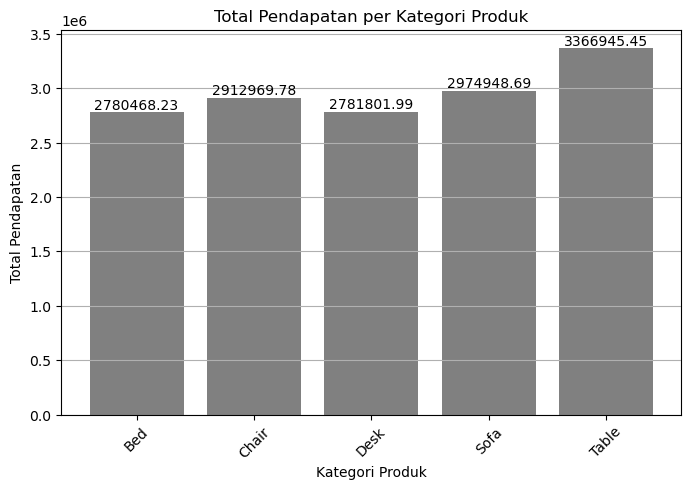

In [11]:
# Menghitung total pendapatan per kategori
revenue_per_category = df.groupby('category')['revenue'].sum().reset_index()

# Membuat bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(revenue_per_category['category'], revenue_per_category['revenue'], color='grey')
plt.title('Total Pendapatan per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menambahkan angka di dalam bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Dari total pendapatan di setiap kategori produk yang paling tinggi total pendapatannya adalah kategori table, ini mengindekasikan bahwa table menjadi sesuatu yang paling dibutuhkan oleh konsumen. dan juga jika ada tren tertentu yang meningkatkan kebutuhan akan table (misalnya, kerja dari rumah), ini dapat meningkatkan penjualan.

### 5. Apakah waktu pengiriman memengaruhi volume penjualan? (Visualisasi: Line chart )


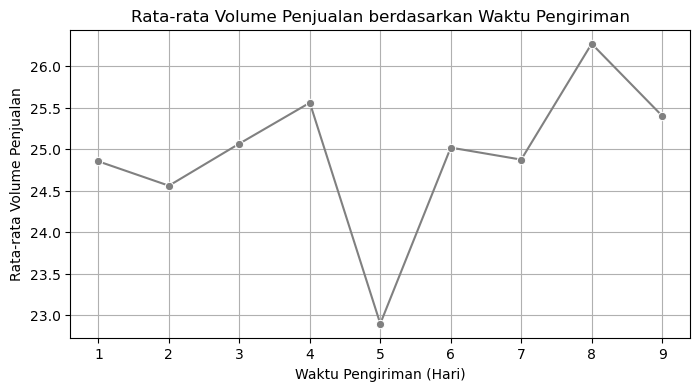

In [17]:
# Menghitung rata-rata penjualan berdasarkan waktu pengiriman
mean_sales = df.groupby('delivery_days')['sales'].mean().reset_index()

plt.figure(figsize=(8, 4))

# Menggunakan warna pink
sns.lineplot(x='delivery_days', y='sales', data=mean_sales, marker='o', color='grey')  # Kode warna pink

plt.title('Rata-rata Volume Penjualan berdasarkan Waktu Pengiriman')
plt.xlabel('Waktu Pengiriman (Hari)')
plt.ylabel('Rata-rata Volume Penjualan')
plt.grid(True)
plt.show()


Line chart di atas menunjukkan bahwa penjualan berdasarkan lamanya waktu pengiriman, dimana pada waktu pengiriman 5 hari terjadi penurunan penjualan,  ini bisa terjadi karena pelanggan tidak hanya mempertimbangkan waktu pengiriman, tetapi juga berbagai faktor lainnya, seperti persepsi kualitas, ketersediaan produk, dan nilai tawaran.

### 6. Bagaimana total pendapatan per kategori produk di setiap tipe store? (visualisasi-pie chart)

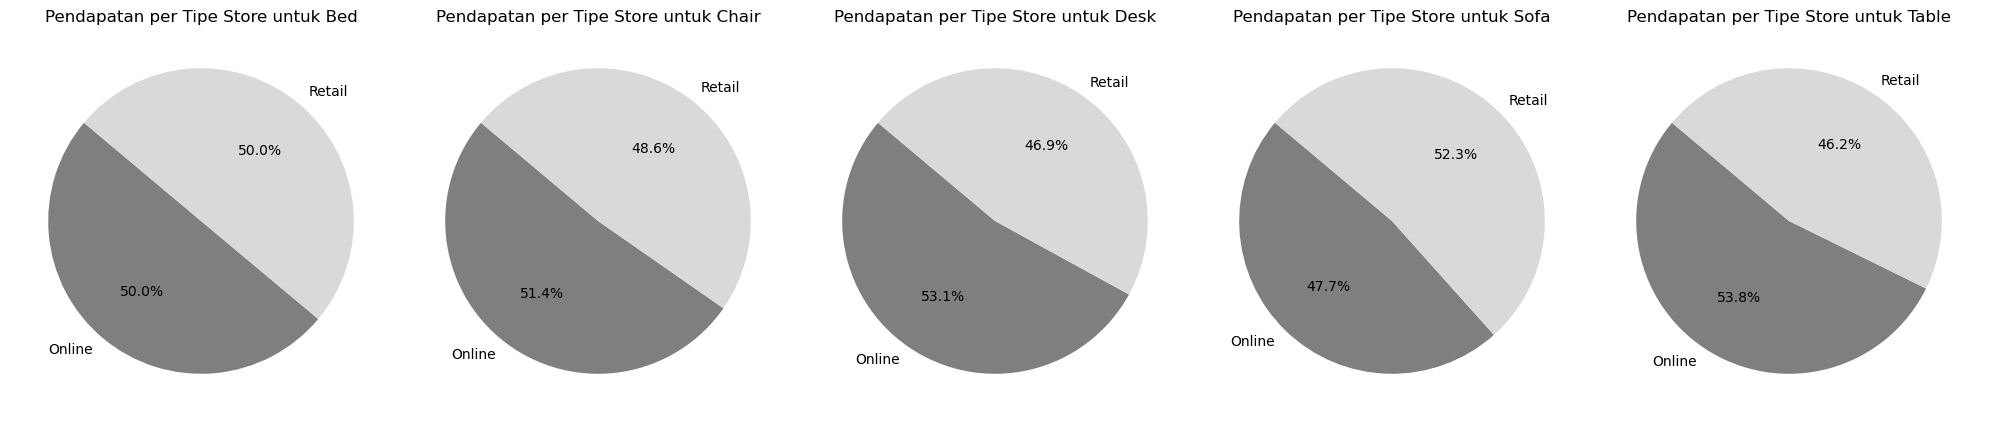

In [18]:

# Menghitung total pendapatan per tipe store untuk setiap kategori produk
revenue_per_category_store = df.groupby(['category', 'store_type'])['revenue'].sum().unstack()

# Membuat pie chart untuk setiap kategori produk
categories = revenue_per_category_store.index

# Mendefinisikan warna untuk pie chart
colors = ['#7F7F7F','#D9D9D9']  

# Membuat plot
fig, axs = plt.subplots(1, len(categories), figsize=(20, 6))

for i, category in enumerate(categories):
    axs[i].pie(revenue_per_category_store.loc[category], 
                labels=revenue_per_category_store.columns, 
                autopct='%1.1f%%', 
                startangle=140,
                colors=colors)
    axs[i].set_title(f'Pendapatan per Tipe Store untuk {category}')

plt.tight_layout()
plt.show()


Tingginya pendapatan di kategori produk untuk tipe toko online menunjukkan bahwa belanja online telah menjadi preferensi utama bagi banyak pelanggan. Toko fisik perlu mempertimbangkan strategi untuk bersaing, seperti meningkatkan pengalaman belanja di dalam toko, menawarkan penawaran khusus, dan memanfaatkan pemasaran digital.

### 7. Bagaimana total penjualan permusimnya di tipe toko? (Visualisasi Stacked Bar Chart)

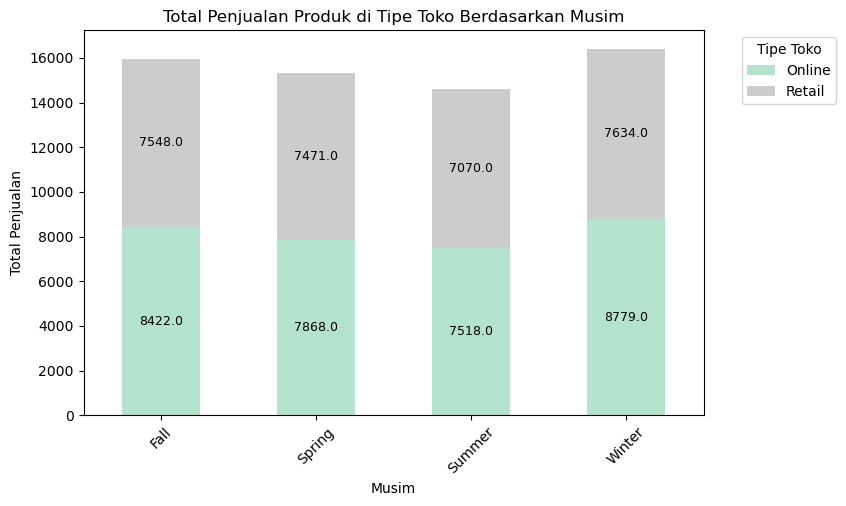

In [19]:
# Menghitung total penjualan per musim dan tipe toko
sales_by_season_store = df.groupby(['season', 'store_type'])['sales'].sum().unstack()

# Membuat stacked bar chart
plt.figure(figsize=(8, 5))
bars = sales_by_season_store.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Pastel2')

# Menambahkan judul dan label
plt.title('Total Penjualan Produk di Tipe Toko Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.legend(title='Tipe Toko', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan angka di dalam bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Hanya menampilkan untuk bar yang lebih dari 0
            plt.annotate(f'{height}', 
                         xy=(bar.get_x() + bar.get_width() / 2, 
                             bar.get_y() + height / 2),
                         ha='center', va='center', 
                         fontsize=9, color='black')

plt.show()

Kestabilan penjualan di setiap musim menunjukkan bahwa perusahaan telah berhasil menciptakan fondasi yang kuat dalam hal produk, pemasaran, dan hubungan pelanggan. Untuk meningkatkan penjualan lebih lanjut, perusahaan dapat melakukan analisis mendalam untuk mengidentifikasi segmen pasar mana yang mungkin bisa dijangkau lebih baik, serta mempertimbangkan inovasi produk atau strategi pemasaran yang lebih spesifik sesuai dengan tren musiman.

### 8. Bagaimana perbandingan total harga dengan tipe toko? (Visualisasi pie chart)

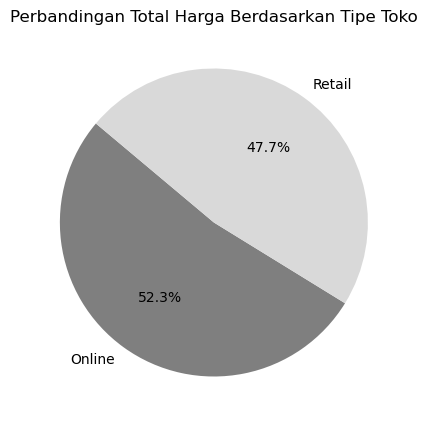

In [20]:
# Menghitung total harga berdasarkan tipe toko
total_price_per_store = df.groupby('store_type')['price'].sum()

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(total_price_per_store, 
        labels=total_price_per_store.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#7F7F7F','#D9D9D9'])

plt.title('Perbandingan Total Harga Berdasarkan Tipe Toko')
plt.show()

Pada pie chart di atas perbandingan harga di tipe toko online lebih tinggi dari pada retail, hal ini mengatakan bahwa kalau pelanggan tetap nyaman melakukan pembelian online karna bisa jadi lebih praktis dan efisien. Kemudian toko online mungkin menerapkan strategi penetapan harga yang berbeda, di mana mereka menargetkan pelanggan yang bersedia membayar lebih untuk kemudahan dan pengalaman belanja yang lebih baik.

### 9. Bagaimana perbandingan total diskon dengan tipe toko? (Visualisasi pie chart)

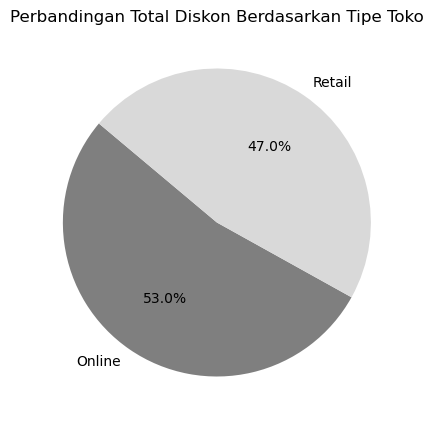

In [21]:
# Menghitung total diskon berdasarkan tipe toko
total_price_per_store = df.groupby('store_type')['discount_percentage'].sum()

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(total_price_per_store, 
        labels=total_price_per_store.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#7F7F7F','#D9D9D9'])

plt.title('Perbandingan Total Diskon Berdasarkan Tipe Toko')
plt.show()

Pada pie chart di atas, dapat dilihat bahwa toko online juga lebih banyak memberikan diskon kepada pelanggan, walaupun harga di toko online lebih tinggi, diskon yang diberikan juga tinggi. Dan dengan strategi memberikan diskon, pelanggan pasti akan lebih tertarik. 

## F. Kesimpulan

### Recap

1. Kestabilan dan Kualitas Margin: Distribusi profit margin yang stabil menunjukkan bahwa perusahaan memiliki kontrol yang baik terhadap biaya dan harga, menciptakan kondisi yang mendukung kestabilan penjualan di setiap brand.

2. Permintaan Pasar yang Kuat: Kategori produk, khususnya table, menunjukkan permintaan yang tinggi, kemungkinan dipicu oleh tren seperti kerja dari rumah, yang menunjukkan respons positif terhadap perubahan kebutuhan konsumen.

3. Pentingnya Saluran Penjualan: Toko online telah menjadi saluran penjualan yang dominan, mencerminkan preferensi konsumen terhadap kenyamanan dan efisiensi belanja online. Hal ini mengindikasikan perlunya strategi pemasaran yang lebih agresif dan inovatif untuk menarik pelanggan di toko fisik.

4. Variasi dan Respons Terhadap Waktu Pengiriman: Penurunan penjualan pada waktu pengiriman 5 hari menunjukkan bahwa pelanggan mempertimbangkan lebih dari sekadar kecepatan pengiriman. Ini menekankan pentingnya memberikan nilai yang lebih besar, seperti kualitas produk dan pelayanan, untuk mempertahankan kepuasan pelanggan.

5. Strategi Penetapan Harga dan Diskon: Meskipun harga di toko online lebih tinggi, strategi diskon yang agresif dapat menarik pelanggan, menunjukkan bahwa harga bukan satu-satunya faktor dalam keputusan pembelian.

### Insight

Secara keseluruhan, perusahaan harus terus mengoptimalkan strategi produk dan pemasaran di seluruh saluran penjualan, sambil mempertahankan kualitas dan kontrol biaya yang baik. Adaptasi terhadap kebutuhan konsumen yang berubah dan pemanfaatan saluran penjualan online dengan strategi harga yang cerdas dapat meningkatkan pertumbuhan penjualan dan kepuasan pelanggan di periode berikutnya.

### Summary

Perusahaan memiliki kontrol margin yang baik, memungkinkan strategi penjualan yang stabil. Fokus pada produk dengan permintaan tinggi seperti meja dan strategi diskon di toko online dapat membantu mencapai target penjualan online 15%. Sementara itu, strategi pemasaran yang lebih kreatif diperlukan untuk menarik pelanggan di toko fisik guna mencapai peningkatan penjualan 10%. Selain itu, perbaikan layanan pengiriman dan pengalaman belanja offline juga penting untuk meningkatkan kepuasan dan loyalitas pelanggan.